In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision.all import *
import pandas as pd
import pathlib

# Duplicate 500 random `No Finding` Selections from CXR8

In [3]:
cxr8df = pd.read_csv('CXR8.csv') # this is https://nihcc.app.box.com/v/ChestXray-NIHCC/file/219760887468 
cxr8df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [4]:
FiveHundoRandomNoFindings = cxr8df.loc[cxr8df['Finding Labels'] == 'No Finding'].drop_duplicates(subset=['Patient ID']).sample(500)
#FiveHundoRandomNoFindings = cxr8df.loc[cxr8df['Finding Labels'] == 'No Finding'].sample(500)
FiveHundoRandomNoFindings.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
36655,00009650_000.png,No Finding,0,9650,66,M,PA,2500,2048,0.168,0.168
110806,00030206_001.png,No Finding,1,30206,45,F,AP,3056,2544,0.139,0.139
55882,00013981_000.png,No Finding,6,13981,72,M,PA,3056,2544,0.139,0.139
53629,00013541_000.png,No Finding,0,13541,74,M,PA,2992,2991,0.143,0.143
74135,00018233_059.png,No Finding,3,18233,42,F,PA,2654,2529,0.143,0.143


# Duplicate 500 random `Pneumonia` Selections from CXR8

In [5]:
#cxr8df = pd.read_csv('CXR8.csv') # this is https://nihcc.app.box.com/v/ChestXray-NIHCC/file/219760887468 
#cxr8df.head()

In [6]:
#FiveHundoRandomPneumonia = cxr8df[cxr8df['Finding Labels'].str.contains('Pneumonia')].drop_duplicates(subset=['Patient ID']).sample(500)
#FiveHundoRandomPneumonia = cxr8df[cxr8df['Finding Labels'].str.contains('Pneumonia')].sample(500)
#FiveHundoRandomPneumonia.head()

# Duplicate Selection of COVID-19 XRays from covid-chestxray-dataset

In [7]:
coviddf = pd.read_csv('covid-xrays.csv') # this is https://github.com/ieee8023/covid-chestxray-dataset/blob/master/metadata.csv
coviddf.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Taiwan",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc2001573,NaN,diffuse infiltrates in the bilateral lower lungs,

In [8]:
AllCovidXRays = coviddf.loc[coviddf['finding'] == 'Pneumonia/Viral/COVID-19'].drop_duplicates(subset=['patientid'])
#AllCovidXRays = coviddf.loc[coviddf['finding'] == 'Pneumonia/Viral/COVID-19']
AllCovidXRays.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Taiwan",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc2001573,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
7,6,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,...,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Province, China",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/article/PIIS0140-6736%2820%2930211-7/fulltext,NaN,"Case 2: chest x-ray obtained on Jan 6 (2A). The brightness of both lungs was decreased and multiple patchy shadows were observed; edges were blurred, and large ground-glass opacity and condensation shadows were mainly on the lower right lobe. Tracheal intubation could be seen in the trachea. Heart shadow roughly presents in the normal range. On the left side, the diaphragmatic surface is not clearly displayed. The right side of the diaphragmatic surface was light and smooth and rib phrenic angle was less sharp. Chest x-ray on Jan 10 showed worse status (2B)",NaN,NaN
20,11,0.0,M,56.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,2020,"Sunnybrook Health Sciences Centre, Toronto, Ontario, Canada",images,1-s2.0-S0140673620303706-fx1_lrg.jpg,10.1016/S0140-6736(20)30370-6,https://www.sciencedirect.com/science/article/pii/S0140673620303706,NaN,"A 56-year-old man presented to our Emergency Department in Toronto, ON, Canada, with fever and non-productive cough, 1 day after returning from a 3-month visit to Wuhan, China. Given this travel history, the transferring ambulance and receiving hospital personnel used appropriate personal protective equipment. He had a medical history of well controlled hypertension. On examination, his maximum temperature was 38·6°C, oxygen saturation was 97% on room air, and respiratory rate was 22 breaths per min—without any signs of respiratory distress. Laboratory investigations showed mild thrombocyt...",NaN,NaN
21,12,7.0,M,42.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,"January 1, 2020","Tongji Medical College, Wuhan, Hubei Province, China",images,nCoV-radiol.2020200269.fig1-day7.jpeg,10.1148/radiol.2020200269,https://pubs.rsna.org/doi/10.1148/radiol.2020200269,NaN,"On January 1, 2020, a 42-year-old man was admitted to the emergency department of Union Hospital (Tongji Medical College, Wuhan, Hubei Province) due to a high-grade fever (39.6°C [103.28°C]), cough, and fatigue for 1 week. Bilateral coarse breath sounds with wet rales distributed at the bases of both lungs were heard on auscultation. A, Chest radiograph obtained on day 7 after the onset of symptoms shows opacities in the left lower and right upper lobes.",NaN,NaN


# Lets Move Data To bkdataset for posterity's sake

In [9]:
import os
import shutil

In [10]:
#FiveHundoRandomPneumonia.index

In [13]:
FiveHundoRandomNoFindings.index

Int64Index([ 79400,  67679, 102054,  90457,  95851,  33763,  67220,  54155,
             92553,  23654,
            ...
              1836,  72302,  87188,  17080,  15557, 106394,  31834,  94879,
             49012,  85571],
           dtype='int64', length=500)

In [14]:
AllCovidXRays.index

Int64Index([  0,   4,   7,  20,  21,  22,  29,  30,  33,  34,
            ...
            891, 894, 909, 919, 930, 934, 935, 936, 937, 939],
           dtype='int64', length=321)

In [15]:
print(pathlib.Path.cwd())
for index, row in AllCovidXRays.iterrows():
    if(row['folder'] == 'images'):
        shutil.move('covid-chestxray-dataset/images/'+row['filename'], 'bkdataset/covid/'+row['filename'])    
    else:
        print("Found a non image folder record")    

/z2/pgupta/Code/bkcovidmodel/COVID-19
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record
Found a non image folder record


In [16]:
print(pathlib.Path.cwd())
for index, row in FiveHundoRandomNoFindings.iterrows():
    shutil.move('CXR8/'+row['Image Index'], 'bkdataset/nofinding/'+row['Image Index'])

/z2/pgupta/Code/bkcovidmodel/COVID-19


In [11]:
#print(pathlib.Path.cwd())
#for index, row in FiveHundoRandomPneumonia.iterrows():
#    shutil.move('CXR8/'+row['Image Index'], 'bkdataset/pneumonia/'+row['Image Index'])

In [12]:
path = pathlib.Path('/z2/pgupta/Code/bkcovidmodel/COVID-19/bkdataset')

In [13]:
def label_func(x): return x.parent.name # get the folder the file is in for a label

In [14]:
fnames = get_image_files(path)

In [15]:
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, valid_pct=0.2, 
                                      item_tfms=Resize(256), bs=32, num_workers=4,
                                      batch_tfms=[*aug_transforms(size=(256,256)), 
                                                  Normalize.from_stats(*imagenet_stats)])

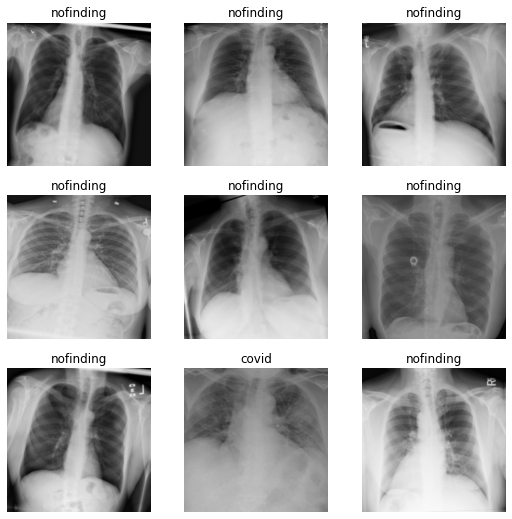

In [16]:
dls.show_batch()

In [17]:
def conv_block(ni, nf, size=3, stride=1):
    for_pad = lambda s: s if s > 2 else 3
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=size, stride=stride,
                  padding=(for_pad(size) - 1)//2, bias=False), 
        nn.BatchNorm2d(nf),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)  
    )

In [18]:
def triple_conv(ni, nf):
    return nn.Sequential(
        conv_block(ni, nf),
        conv_block(nf, ni, size=1),  
        conv_block(ni, nf)
    )

In [19]:
def maxpooling():
    return nn.MaxPool2d(2, stride=2)

In [20]:
model = nn.Sequential(
    conv_block(3, 8),
    maxpooling(),
    conv_block(8, 16),
    maxpooling(),
    triple_conv(16, 32),
    maxpooling(),
    triple_conv(32, 64),
    maxpooling(),
    triple_conv(64, 128),
    maxpooling(),
    triple_conv(128, 256),
    conv_block(256, 128, size=1),
    conv_block(128, 256),
    ConvLayer(256, 3),
    Flatten(),
    nn.Linear(507, 3)
)

In [21]:
#learn = cnn_learner(dls, resnet101, metrics=error_rate)
learn = Learner(dls, model, metrics=[accuracy, error_rate])

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=3.0199516913853586e-05)

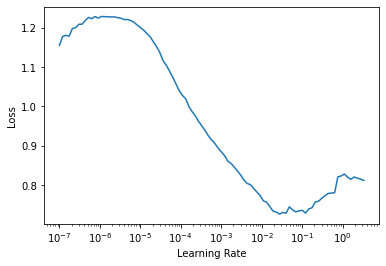

In [22]:
learn.lr_find()

In [23]:
print(learn.summary())

Sequential (Input shape: 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 8 x 256 x 256  
Conv2d                                    216        True      
BatchNorm2d                               16         True      
LeakyReLU                                                      
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 16 x 128 x 128 
Conv2d                                    1152       True      
BatchNorm2d                               32         True      
LeakyReLU                                                      
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 32 x 64 x 64   
Conv2d                                    4608       True      
BatchNorm2d                               64       

In [24]:
learn.fit_one_cycle(30, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.624984,0.858528,0.437500,0.562500,00:06
1,0.515916,0.628973,0.662500,0.337500,00:06
2,0.459901,0.684195,0.700000,0.300000,00:06
3,0.408954,0.505606,0.825000,0.175000,00:07
4,0.376362,0.807732,0.768750,0.231250,00:06
5,0.374580,0.995775,0.750000,0.250000,00:06
6,0.362298,0.457681,0.793750,0.206250,00:06
7,0.387641,0.737718,0.762500,0.237500,00:06
8,0.387437,0.726248,0.775000,0.225000,00:06
9,0.375220,0.534971,0.812500,0.187500,00:06


In [25]:
learn.fit_one_cycle(30, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.094636,0.201436,0.881250,0.118750,00:06
1,0.108084,0.218041,0.893750,0.106250,00:06
2,0.151265,0.661432,0.700000,0.300000,00:06
3,0.183721,0.562619,0.862500,0.137500,00:06
4,0.189639,0.527403,0.825000,0.175000,00:06
5,0.204311,0.387135,0.881250,0.118750,00:06
6,0.223986,0.476719,0.843750,0.156250,00:06
7,0.236099,0.528865,0.837500,0.162500,00:06
8,0.223143,0.290713,0.906250,0.093750,00:06
9,0.225558,0.398636,0.850000,0.150000,00:06


In [26]:
learn.fit_one_cycle(30, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.085576,0.193835,0.943750,0.056250,00:06
1,0.085296,0.196020,0.925000,0.075000,00:06
2,0.082290,0.212693,0.912500,0.087500,00:06
3,0.112378,0.668449,0.750000,0.250000,00:06
4,0.134331,1.864051,0.550000,0.450000,00:06
5,0.148854,0.804460,0.831250,0.168750,00:06
6,0.153507,0.305374,0.912500,0.087500,00:06
7,0.162970,0.426394,0.887500,0.112500,00:06
8,0.177070,0.253231,0.900000,0.100000,00:06
9,0.183032,0.432545,0.837500,0.162500,00:06


In [27]:
learn.fit_one_cycle(30, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.067290,0.191460,0.943750,0.056250,00:06
1,0.059828,0.211502,0.931250,0.068750,00:06
2,0.066198,0.240184,0.962500,0.037500,00:06
3,0.078805,0.234271,0.875000,0.125000,00:06
4,0.095692,0.415183,0.793750,0.206250,00:07
5,0.102941,0.618322,0.850000,0.150000,00:06
6,0.134251,0.412486,0.856250,0.143750,00:06
7,0.137699,0.894337,0.718750,0.281250,00:06
8,0.132466,0.227051,0.906250,0.093750,00:06
9,0.145084,0.369828,0.893750,0.106250,00:06


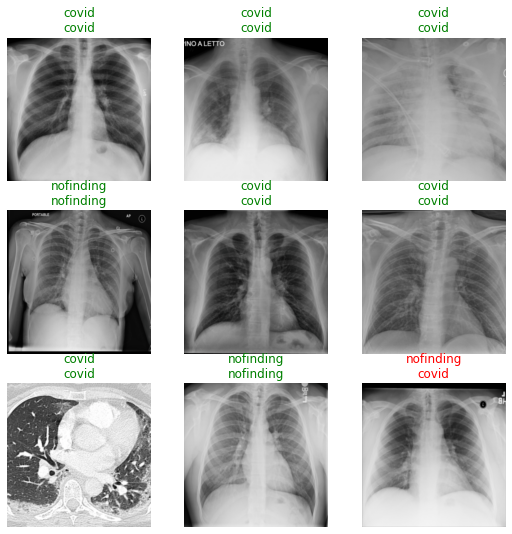

In [28]:
learn.show_results()

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

In [30]:
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)


True

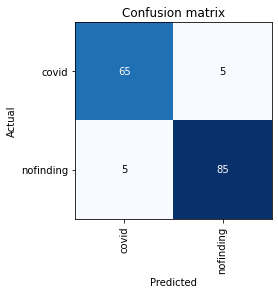

In [31]:
interp.plot_confusion_matrix()

# Lets Save Our Model

In [32]:
learn.export(str(pathlib.Path.cwd())+'/models/binary-class-pg.pkl')